In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

import os
for dirname, _, filenames in os.walk('D:\personal\kaggle\input'):# download dataset and update directory path
        print(os.path.join(dirname))

D:\personal\kaggle\input
D:\personal\kaggle\input\cars-image-dataset
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset\test
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset\test\Audi
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset\test\Hyundai Creta
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset\test\Mahindra Scorpio
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset\test\Rolls Royce
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset\test\Swift
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset\test\Tata Safari
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset\test\Toyota Innova
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset\train
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset\train\Audi
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset\train\Hyundai Creta
D:\personal\kaggle\input\cars-image-dataset\Cars Dataset\train\Mahindra Scorpio
D:\persona

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'D:\\personal\\kaggle\\input\\cars-image-dataset\\Cars Dataset\\train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [14]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.8050113  0.11016715 0.13369656]
  [0.8042904  0.10980393 0.13343872]
  [0.80720174 0.10980393 0.13427052]
  ...
  [0.84154236 0.8579604  0.87068206]
  [0.8037521  0.816199   0.83512473]
  [0.7074829  0.68722236 0.6961552 ]]

 [[0.8208028  0.11508989 0.1399837 ]
  [0.81546193 0.11365069 0.1371801 ]
  [0.81421417 0.1132348  0.1367642 ]
  ...
  [0.8420712  0.8614852  0.8734437 ]
  [0.7980552  0.80914664 0.8285301 ]
  [0.6924018  0.6687144  0.6766102 ]]

 [[0.87546676 0.12973076 0.16926543]
  [0.87305605 0.12902409 0.1678521 ]
  [0.86681753 0.12736048 0.16452488]
  ...
  [0.8374963  0.8560785  0.8688688 ]
  [0.7872417  0.79459006 0.81272584]
  [0.6479003  0.6229651  0.63127685]]

 ...

 [[0.9960785  0.9960785  0.98823535]
  [0.9960785  0.9960785  0.98823535]
  [0.99266976 0.9994872  0.98823535]
  ...
  [0.9612972  0.9612972  0.9534541 ]
  [0.9608813  0.9608813  0.95303816]
  [0.9607844  0.9607844  0.95294124]]

 [[0.9960785  0.9960785  0.98823535]
  [0.9960785  0.9960785  0.98823535]


In [15]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [17]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'D:\\personal\\kaggle\\input\\cars-image-dataset\\Cars Dataset\\test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [18]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.35761392 0.4198697  0.34094897]
  [0.33947247 0.40074763 0.3208463 ]
  [0.32133102 0.38162556 0.3007436 ]
  ...
  [0.8683213  0.8055762  0.8094978 ]
  [0.8644305  0.8016854  0.80560696]
  [0.86274517 0.8000001  0.80392164]]

 [[0.37348732 0.4468954  0.35216147]
  [0.39260942 0.46405622 0.375206  ]
  [0.41173145 0.48121703 0.39825052]
  ...
  [0.867831   0.8050859  0.80900747]
  [0.8639402  0.8011951  0.80511665]
  [0.86274517 0.8000001  0.80392164]]

 [[0.31771138 0.4116463  0.24540426]
  [0.3083955  0.39889827 0.24589458]
  [0.29907963 0.3861502  0.24638489]
  ...
  [0.8673407  0.8045956  0.80851716]
  [0.8634499  0.8007048  0.80462635]
  [0.86274517 0.8000001  0.80392164]]

 ...

 [[0.434806   0.3955903  0.25833538]
  [0.47019032 0.42886046 0.29231027]
  [0.49166617 0.43933785 0.30667847]
  ...
  [0.5079043  0.44515914 0.34319833]
  [0.50937515 0.4466301  0.34466928]
  [0.5108461  0.44810098 0.3461402 ]]

 [[0.43970904 0.40049335 0.26323846]
  [0.47264186 0.42984107 0.2937812 ]


In [19]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 96)                2

In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [22]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

Epoch 1/50
105/105 [==============================] - 62s 566ms/step - loss: 1.8866 - accuracy: 0.2449 - val_loss: 1.7910 - val_accuracy: 0.3333
Epoch 2/50
105/105 [==============================] - 58s 551ms/step - loss: 1.7575 - accuracy: 0.3311 - val_loss: 1.6616 - val_accuracy: 0.3825
Epoch 3/50
105/105 [==============================] - 58s 549ms/step - loss: 1.6628 - accuracy: 0.3780 - val_loss: 1.5881 - val_accuracy: 0.4084
Epoch 4/50
105/105 [==============================] - 57s 545ms/step - loss: 1.5586 - accuracy: 0.4320 - val_loss: 1.4568 - val_accuracy: 0.4785
Epoch 5/50
105/105 [==============================] - 57s 547ms/step - loss: 1.4595 - accuracy: 0.4600 - val_loss: 1.4090 - val_accuracy: 0.4982
Epoch 6/50
105/105 [==============================] - 57s 544ms/step - loss: 1.3822 - accuracy: 0.5015 - val_loss: 1.3226 - val_accuracy: 0.5363
Epoch 7/50
105/105 [==============================] - 58s 548ms/step - loss: 1.2862 - accuracy: 0.5340 - val_loss: 1.3049 - val_ac

In [23]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 9s 327ms/step - loss: 1.0967 - accuracy: 0.7036


In [24]:
scores

[1.096703290939331, 0.7035670280456543]

In [25]:
history.history.keys()#find key of train model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
type(history.history['loss'])

list

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

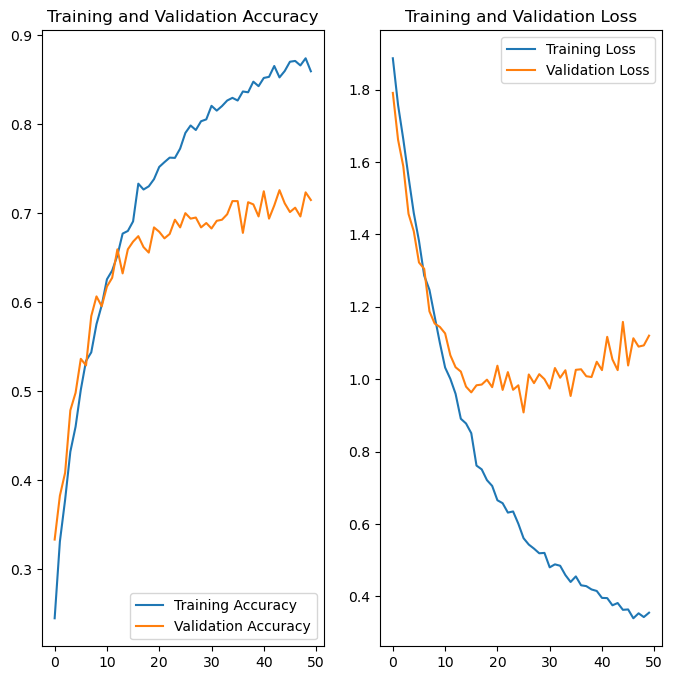

In [30]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 68ms/step


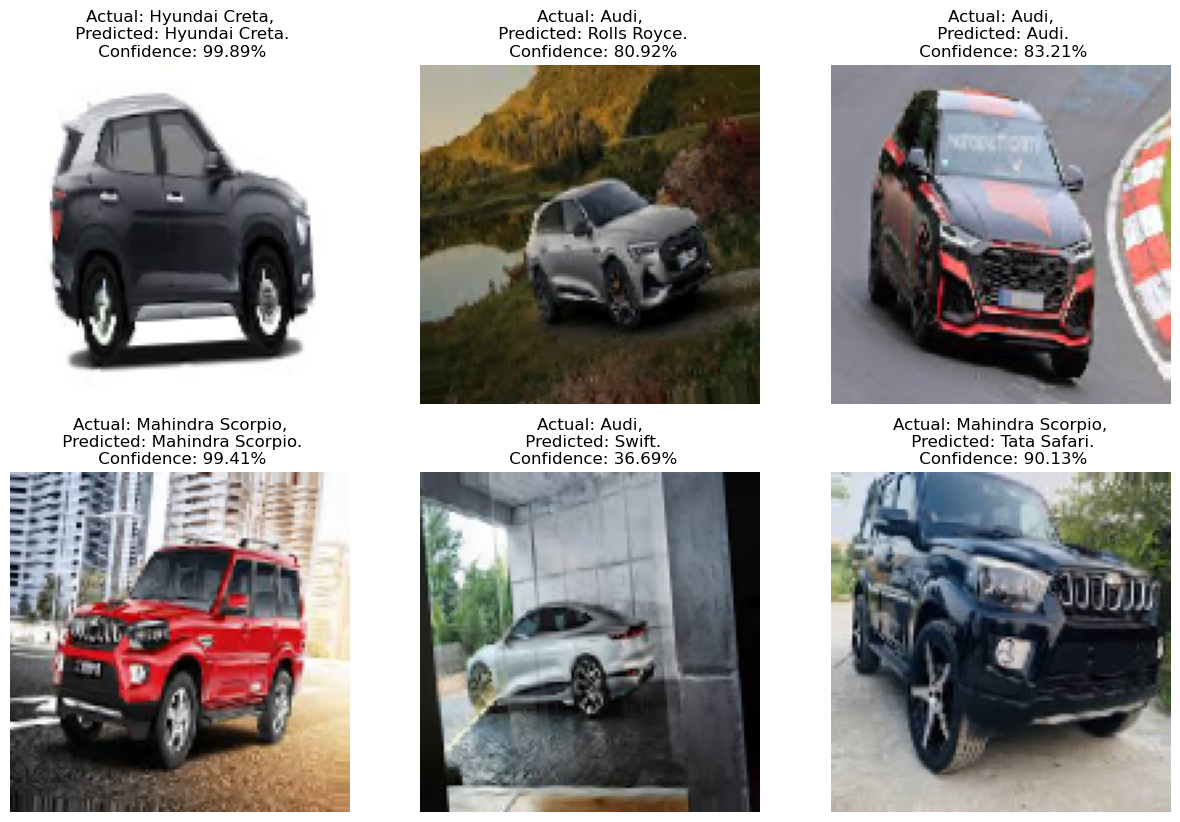

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break